
Classification Report:

              precision    recall  f1-score   support

         0.0     0.9973    0.9999    0.9986    331904
         1.0     0.9660    0.4186    0.5841      1560

    accuracy                         0.9972    333464
   macro avg     0.9816    0.7093    0.7913    333464
weighted avg     0.9971    0.9972    0.9967    333464


Confusion Matrix:



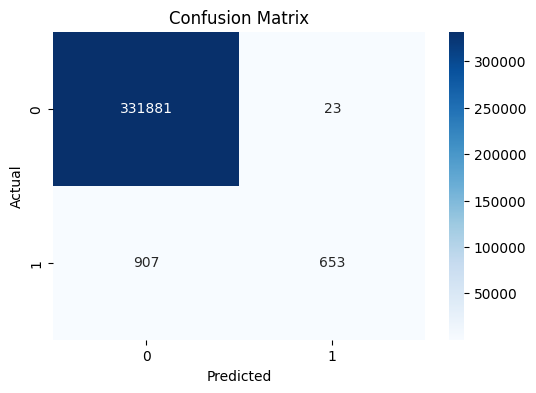


False Positives (Non-fraud predicted as fraud): 23
False Negatives (Fraud predicted as non-fraud): 907


In [2]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load Data
train_df = pd.read_csv('fraudTrain.csv')
test_df = pd.read_csv('fraudTest.csv')

# Step 2: Preprocessing

# Combine train and test for consistent processing
train_df['is_train'] = 1
test_df['is_train'] = 0
full_data = pd.concat([train_df, test_df], ignore_index=True)

# Convert timestamp to datetime
full_data['trans_date_trans_time'] = pd.to_datetime(full_data['trans_date_trans_time'])

# Extract useful time features
full_data['hour'] = full_data['trans_date_trans_time'].dt.hour
full_data['day'] = full_data['trans_date_trans_time'].dt.day
full_data['month'] = full_data['trans_date_trans_time'].dt.month
full_data['weekday'] = full_data['trans_date_trans_time'].dt.weekday

# Drop unnecessary columns
drop_cols = ['trans_date_trans_time', 'cc_num', 'unix_time', 'first', 'last', 'street',
             'city', 'state', 'zip', 'dob', 'merchant', 'trans_num']
full_data = full_data.drop(columns=drop_cols)

# Encode categorical columns
cat_cols = ['category', 'gender', 'job']
full_data = pd.get_dummies(full_data, columns=cat_cols)

# Handle any missing values
full_data = full_data.dropna()

# Step 3: Split back into train and test
train_df = full_data[full_data['is_train'] == 1].drop('is_train', axis=1)
test_df = full_data[full_data['is_train'] == 0].drop('is_train', axis=1)

# Step 4: Split Features and Labels
X_train = train_df.drop('is_fraud', axis=1)
y_train = train_df['is_fraud']

X_test = test_df.drop('is_fraud', axis=1)
y_test = test_df['is_fraud']

# Step 5: Build and Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 6: Predict and Evaluate
y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=4))

# Confusion Matrix
print("\nConfusion Matrix:\n")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Step 7: Misclassification Analysis
false_positives = ((y_pred == 1) & (y_test == 0)).sum()
false_negatives = ((y_pred == 0) & (y_test == 1)).sum()

print(f"\nFalse Positives (Non-fraud predicted as fraud): {false_positives}")
print(f"False Negatives (Fraud predicted as non-fraud): {false_negatives}")